# Introduction to Pandas, Part 2

Advanced Pandas syntax, aggregation, and joining.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import display

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

In [16]:
#Warm up
wd = pd.DataFrame({1:["topdog","botdog"],"1":["topcat","botcat"]})

wd[0:]
#
#elections.loc[elections["%"] > 50, ["Candidate", "Year"]].head(3)
#elections.loc[elections["%"] > 50, ["Candidate", "Year"]].iloc[0:2, :]

1       1
0  topdog  topcat
1  botdog  botcat

Let's start by loading the California baby names dataset.

In [18]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

####MAKE SURE you put the zipfile in the same folder as your data
zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)
#babynames.head(5)
babynames.sample(5)

State Sex  Year      Name  Count
287394    CA   M  1978  Bernardo     42
256855    CA   M  1953    Randal     86
60281     CA   F  1969     Licia      8
71223     CA   F  1974     Frank      5
317545    CA   M  1992    Yadira      5

## Goal 1: Find the most popular baby name in California in 2018

In [21]:
babynames[babynames["Year"]==2018].sort_values(by="Count",ascending=False).head(5)

State Sex  Year    Name  Count
221160    CA   F  2018    Emma   2743
385701    CA   M  2018    Noah   2569
221161    CA   F  2018     Mia   2499
221162    CA   F  2018  Olivia   2465
385702    CA   M  2018    Liam   2413

In [22]:
babynames[babynames["Year"]==2018].sort_values(by="Count",ascending=False).tail(5)

State Sex  Year    Name  Count
224699    CA   F  2018   Marni      5
224700    CA   F  2018  Marnie      5
224701    CA   F  2018    Masa      5
224702    CA   F  2018   Maura      5
388552    CA   M  2018  Zuriel      5

## Goal 2: Find baby names that start with j. 

### Approach 1: Loop and filter

In [25]:
starts_with_j = [x.startswith('J') for x in babynames["Name"]]
babynames[starts_with_j]

State Sex  Year       Name  Count
16        CA   F  1910  Josephine     66
44        CA   F  1910       Jean     35
46        CA   F  1910     Jessie     32
59        CA   F  1910      Julia     28
66        CA   F  1910    Juanita     25
...      ...  ..   ...        ...    ...
393987    CA   M  2020         Jr      5
393988    CA   M  2020    Juaquin      5
393989    CA   M  2020       June      5
393990    CA   M  2020    Juniper      5
393991    CA   M  2020  Juventino      5

[33844 rows x 5 columns]

In [26]:
starts_with_j = [x[0] == 'J' for x in babynames["Name"]]
babynames[starts_with_j]

State Sex  Year       Name  Count
16        CA   F  1910  Josephine     66
44        CA   F  1910       Jean     35
46        CA   F  1910     Jessie     32
59        CA   F  1910      Julia     28
66        CA   F  1910    Juanita     25
...      ...  ..   ...        ...    ...
393987    CA   M  2020         Jr      5
393988    CA   M  2020    Juaquin      5
393989    CA   M  2020       June      5
393990    CA   M  2020    Juniper      5
393991    CA   M  2020  Juventino      5

[33844 rows x 5 columns]

In [27]:
%timeit starts_with_j = [x.startswith('J') for x in babynames["Name"]] 
%timeit starts_with_j = [x[0] == 'J' for x in babynames["Name"]]

83.2 ms ± 525 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
55.8 ms ± 872 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Approach 2: Use the Series.str methods.



In [29]:
babynames[babynames["Name"].str.startswith('J')]

State Sex  Year       Name  Count
16        CA   F  1910  Josephine     66
44        CA   F  1910       Jean     35
46        CA   F  1910     Jessie     32
59        CA   F  1910      Julia     28
66        CA   F  1910    Juanita     25
...      ...  ..   ...        ...    ...
393987    CA   M  2020         Jr      5
393988    CA   M  2020    Juaquin      5
393989    CA   M  2020       June      5
393990    CA   M  2020    Juniper      5
393991    CA   M  2020  Juventino      5

[33844 rows x 5 columns]

109 ms ± 521 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Quick detour** - which option performs better?

In [31]:
%timeit starts_with_j = [x.startswith('J') for x in babynames["Name"]] 
%timeit starts_with_j = [x[0] == 'J' for x in babynames["Name"]]
%timeit babynames["Name"].str.startswith('J') # 

83.2 ms ± 860 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
55.5 ms ± 627 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
109 ms ± 962 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### In-lecture challenge

Try to write a line of code that creates a list (or Series or array) of all names that end with “ert”.

<details>
    <summary>Answer</summary>
    <pre>
    babynames[babynames["Name"].str.endswith('ert')]["Name"].unique()
    </pre>
</details>

In [32]:
babynames[babynames["Name"].str.endswith('ert')]["Name"].unique()

array(['Robert', 'Gilbert', 'Albert', 'Herbert', 'Bert', 'Hubert',
       'Delbert', 'Elbert', 'Wilbert', 'Norbert', 'Rupert', 'Filbert',
       'Adelbert', 'Evert', 'Calvert', 'Lambert', 'Hilbert', 'Philbert',
       'Engelbert', 'Levert', 'Robbert', 'Johnrobert', 'Mert'],
      dtype=object)

---

## Goal 3: Sort names by their length.

Suppose we want to sort all baby names in California by their length.


In [41]:
babynames.iloc[[i for i,m in sorted(enumerate(babynames["Name"]), key =lambda x: -len(x[1]))]].head(5)
#babynames.iloc[[i for i,m in sorted(enumerate(babynames["Name"]), key =lambda x: -len(x[1]))]].tail(5)

State Sex  Year             Name  Count  name_lengths
332035    CA   M  1998  Franciscojavier      6            15
329864    CA   M  1997  Franciscojavier      5            15
320036    CA   M  1993  Ryanchristopher      5            15
314358    CA   M  1991  Ryanchristopher      7            15
319923    CA   M  1993  Johnchristopher      5            15

### Approach 1: Create a temporary column.

Create a new series of only the lengths. Then add that series to the dataframe as a column. Then sort by that column. Then drop that column.

In [39]:
babynames["name_lengths"] = babynames["Name"].str.len()
babynames.head(5)

State Sex  Year      Name  Count  name_lengths
0    CA   F  1910      Mary    295             4
1    CA   F  1910     Helen    239             5
2    CA   F  1910   Dorothy    220             7
3    CA   F  1910  Margaret    163             8
4    CA   F  1910   Frances    134             7

In [40]:
#sort by the temporary column
babynames = babynames.sort_values(by = "name_lengths", ascending = False)
babynames

State Sex  Year             Name  Count  name_lengths
332035    CA   M  1998  Franciscojavier      6            15
329864    CA   M  1997  Franciscojavier      5            15
320036    CA   M  1993  Ryanchristopher      5            15
314358    CA   M  1991  Ryanchristopher      7            15
319923    CA   M  1993  Johnchristopher      5            15
...      ...  ..   ...              ...    ...           ...
245144    CA   M  1937               Ed     17             2
309408    CA   M  1989               Cj      6             2
95648     CA   F  1984               Mi      9             2
17191     CA   F  1940               Jo    169             2
298024    CA   M  1984               Bo     17             2

[394179 rows x 6 columns]

In [43]:
#drop the temporary column
babynames = babynames.drop("name_lengths", axis= 'columns')
                           
babynames.head(10)

State Sex  Year             Name  Count
332035    CA   M  1998  Franciscojavier      6
329864    CA   M  1997  Franciscojavier      5
320036    CA   M  1993  Ryanchristopher      5
314358    CA   M  1991  Ryanchristopher      7
319923    CA   M  1993  Johnchristopher      5
337003    CA   M  2000  Franciscojavier      6
305111    CA   M  1987  Franciscojavier      5
330040    CA   M  1997  Ryanchristopher      5
306544    CA   M  1988  Franciscojavier     10
309451    CA   M  1989  Franciscojavier      6

We can also use the Python map function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [45]:
def dr_ea_count(string):
    return string.count('dr')+ string.count('ea')

babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)
babynames
babynames = babynames.sort_values(by = "dr_ea_count",ascending=False)
babynames.head()

State Sex  Year      Name  Count  dr_ea_count
131013    CA   F  1994  Leandrea      5            3
101962    CA   F  1986  Deandrea      6            3
115942    CA   F  1990  Deandrea      5            3
300700    CA   M  1985  Deandrea      6            3
108715    CA   F  1988  Deandrea      5            3

In [46]:
#drop that column
babynames = babynames.drop("dr_ea_count",1)
babynames.head()

State Sex  Year      Name  Count
131013    CA   F  1994  Leandrea      5
101962    CA   F  1986  Deandrea      6
115942    CA   F  1990  Deandrea      5
300700    CA   M  1985  Deandrea      6
108715    CA   F  1988  Deandrea      5

### Approach 2: Generate an index sorted in the desired order.

In [4]:
#let's start over by first scrambling the order of babynames


Another approach is to take advantage of the fact that `.loc` can accept an index. That is:
 + `df.loc[idx]` returns df with its rows in the same order as the given index.
 + Only works if the index exactly matches the DataFrame.

The first step was to create a sequence of the lengths of the names.

In [48]:
name_lengths = babynames["Name"].str.len()


The next step is to sort the new series we just created.

In [50]:
name_sort_by_len = name_lengths.sort_values()
name_sort_by_len
index_length_sorted = name_sort_by_len.index

Next, we pass the index of the sorted series to the loc method of the original dataframe.

In [52]:
babynames.loc[index_length_sorted[::-1]]

State Sex  Year             Name  Count
314358    CA   M  1991  Ryanchristopher      7
330040    CA   M  1997  Ryanchristopher      5
102490    CA   F  1986  Mariadelosangel      5
320036    CA   M  1993  Ryanchristopher      5
309451    CA   M  1989  Franciscojavier      6
...      ...  ..   ...              ...    ...
390093    CA   M  2019               Cy     11
301878    CA   M  1986               Bo     18
316937    CA   M  1992               Aj      6
292836    CA   M  1981               Al     10
298024    CA   M  1984               Bo     17

[394179 rows x 5 columns]

Note we can also do this all in one line:

In [54]:
babynames.loc[babynames["Name"].str.len().sort_values().index[::-1]]

State Sex  Year             Name  Count
314358    CA   M  1991  Ryanchristopher      7
330040    CA   M  1997  Ryanchristopher      5
102490    CA   F  1986  Mariadelosangel      5
320036    CA   M  1993  Ryanchristopher      5
309451    CA   M  1989  Franciscojavier      6
...      ...  ..   ...              ...    ...
390093    CA   M  2019               Cy     11
301878    CA   M  1986               Bo     18
316937    CA   M  1992               Aj      6
292836    CA   M  1981               Al     10
298024    CA   M  1984               Bo     17

[394179 rows x 5 columns]

---

### Goal 4: Name whose popularity has changed the most. 

First we need to define change in popularity. 

For the purposes of lecture, let’s stay simple and use the AMMD (absolute max/min difference): max(count) - min(count). 

To make sure we understand this quantity, let's consider the name Jennifer.

In [58]:
jennifer_counts = babynames.query("Name == 'Jennifer'")["Count"]

6059

The AMMD for Jennifer is 6,059, as seen below:

In [60]:
max(jennifer_counts) - min(jennifer_counts)

6059

In [61]:
def ammd(series):
    return max(series) - min(series)

In [62]:
ammd(babynames.query("Name == 'Jessica'")["Count"])

6946

### Approach 1: Naive For Loop

As a first approach, we can try to use a for loop.

In [66]:
#build dictionary where entry i is the ammd for the given name
#e.g. ammd["jennifer"] should be 6059
ammd_of_babyname_counts = {}
for name in babynames["Name"].unique()[0:100]:
    ammd_of_babyname_counts[name] = ammd(babynames[babynames["Name"]==name]["Count"])
    
ammd_of_babyname_counts

{'Leandrea': 0,
 'Deandrea': 1,
 'Andrea': 1578,
 'Deandre': 124,
 'Leandro': 67,
 'Alexandrea': 69,
 'Andreas': 36,
 'Audrea': 2,
 'Leandra': 35,
 'Adrean': 3,
 'Adreanna': 6,
 'Keandra': 3,
 'Adreana': 7,
 'Keandre': 6,
 'Deandra': 24,
 'Aundrea': 25,
 'Deadra': 1,
 'Leandre': 9,
 'Andreana': 6,
 'Audreanna': 1,
 'Andreanna': 2,
 'Ondrea': 0,
 'Andreah': 0,
 'Anndrea': 0,
 'Adrea': 2,
 'Adrieanna': 0,
 'Deaundre': 0,
 'Joseandres': 0,
 'Deidra': 21,
 'Rodrigo': 335,
 'Jeana': 22,
 'Aldrin': 3,
 'Jeanne': 338,
 'Deann': 57,
 'Mildred': 309,
 'Chandra': 86,
 'Adrielle': 5,
 'Casaundra': 4,
 'Dedrick': 3,
 'Reagan': 255,
 'Audrey': 989,
 'Casandra': 95,
 'Alexandre': 38,
 'Kassandra': 612,
 'Ocean': 40,
 'Deanna': 586,
 'Seamus': 23,
 'Aleah': 93,
 'Dandre': 24,
 'Theadore': 4,
 'Ysidro': 5,
 'Brea': 25,
 'Leah': 806,
 'Jeannie': 151,
 'Jeanine': 91,
 'Leann': 70,
 'Keane': 6,
 'Jeanelle': 14,
 'Ileana': 55,
 'Julieanna': 12,
 'Julieanne': 8,
 'Demarea': 4,
 'Andre': 361,
 'Deante': 13,

Answer below. Note that we only used the first 100 names because otherwise the code takes ages to complete running.

In [6]:

%%timeit
ammd_of_babyname_counts = {}

#build dictionary where entry i is the ammd for the given name
#e.g. ammd["jennifer"] should be 6059

25.9 ns ± 0.979 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Approach 2: Use groupby.agg

Instead, we can use the very powerful groupby.agg operation, which allows us to simply and efficiently compute what we want.

In [68]:
babynames.groupby("Name").agg(min).head(5)

State Sex  Year  Count
Name                          
Aadan      CA   M  2008      5
Aadarsh    CA   M  2019      6
Aaden      CA   M  2007     10
Aadhav     CA   M  2014      6
Aadhira    CA   F  2017      6

In [69]:
babynames.groupby("Name").agg(ammd)

Year  Count
Name                
Aadan       6      2
Aadarsh     0      0
Aaden      13    148
Aadhav      5      2
Aadhira     3      4
...       ...    ...
Zyler       6      5
Zymir       0      0
Zyon       21     10
Zyra        8     10
Zyrah       9      1

[20029 rows x 2 columns]

Note that the result includes both a Year and Count column. The Count column is what we want, namely the AMMD for the name in that row. To check your understanding, try to figure out what the Year column represents.

To understand how groupby works, consider the visual diagram below. The `groupby` function clusters rows from the original dataframe into groups (which I call subframes). The `agg` function then condenses each subframe into a single representative row using the provided function f.

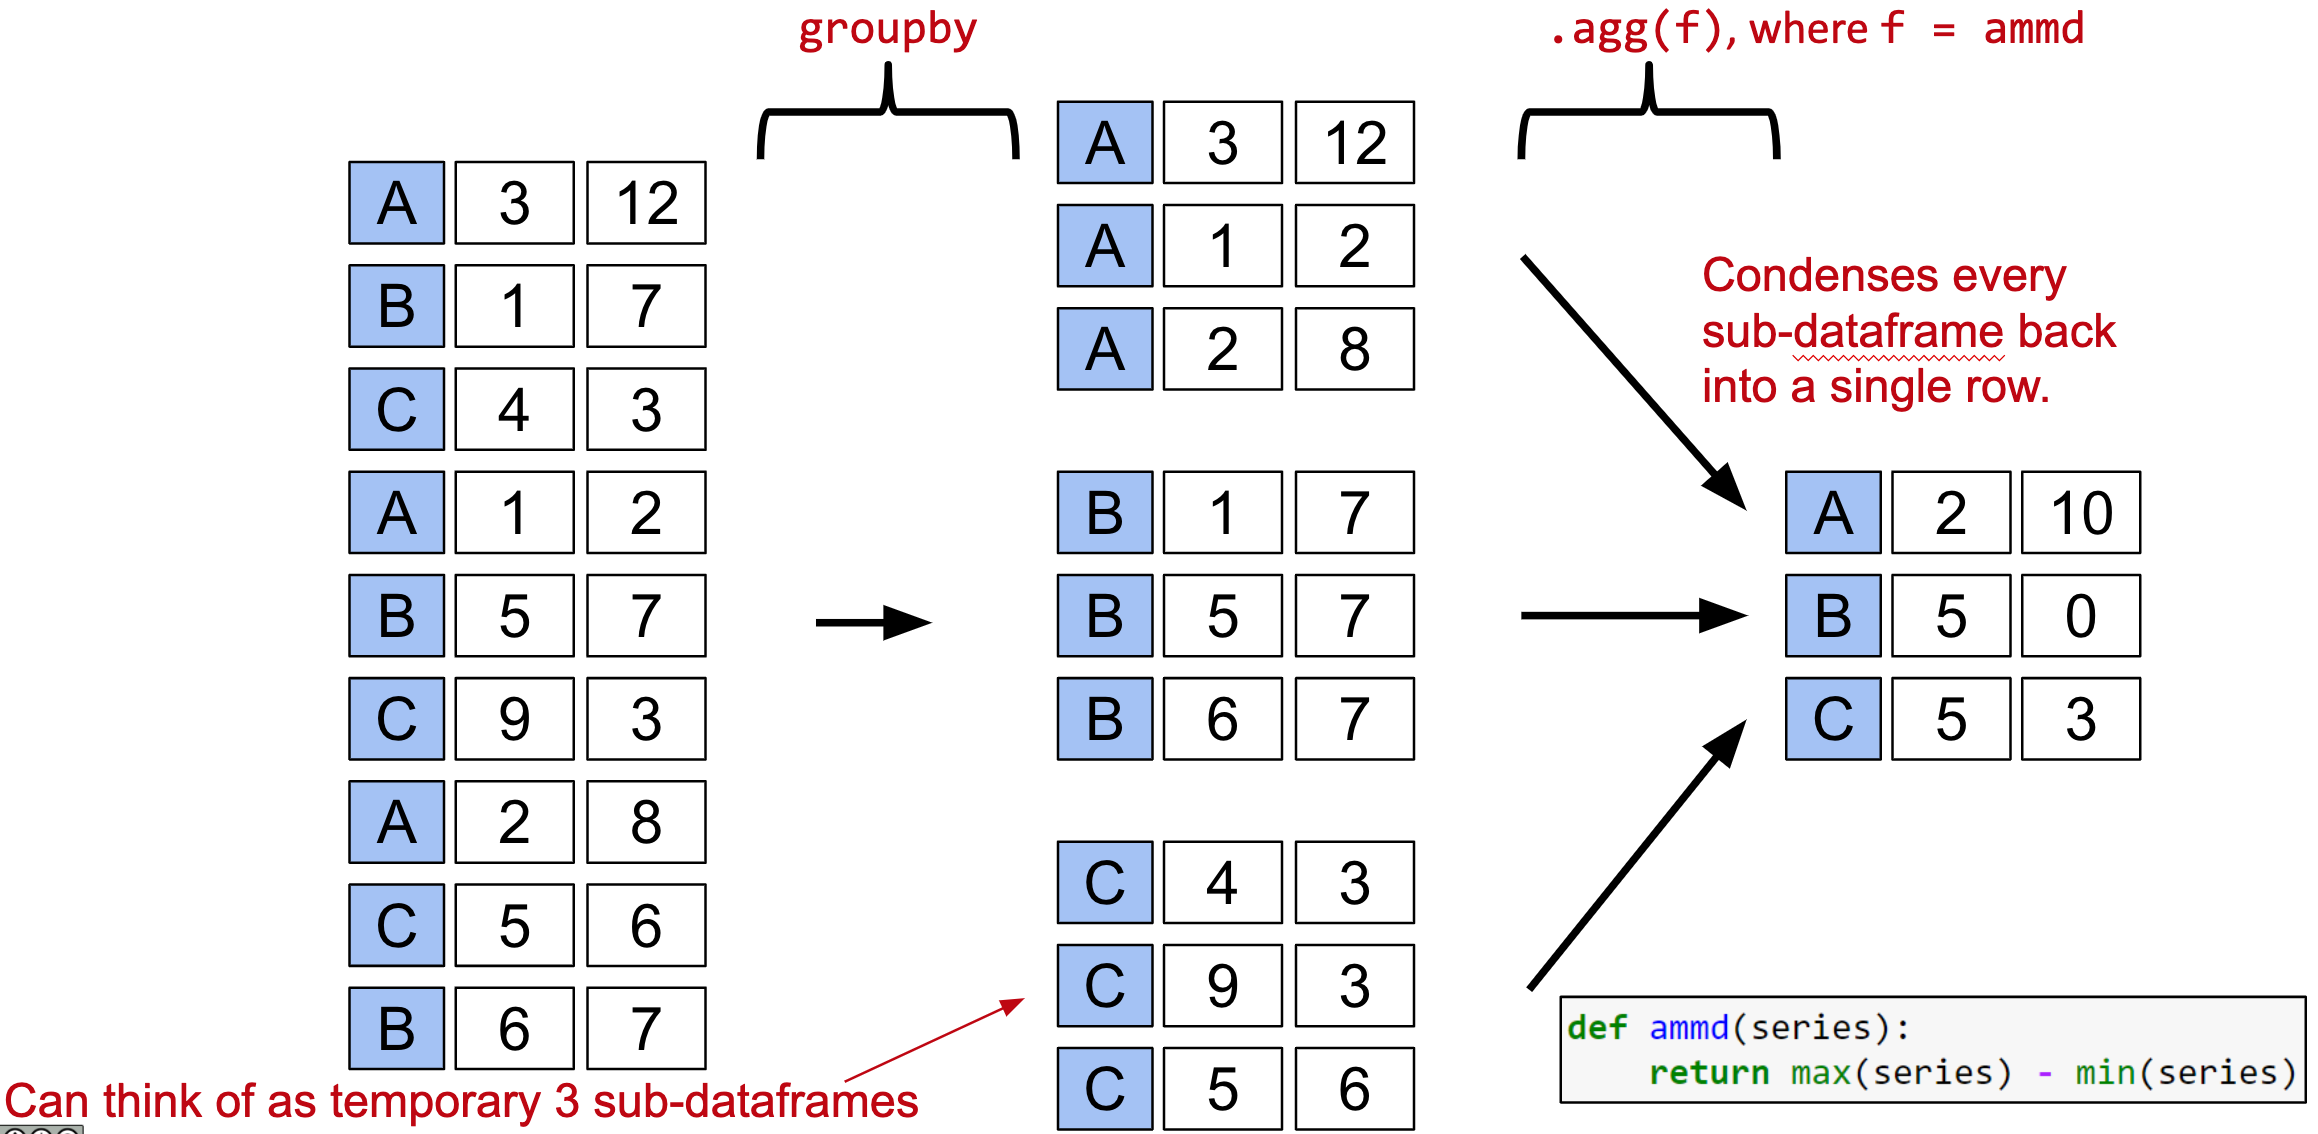

Let's actually build this DataFrame and play with it interactively to understand `groupby` a little better:

In [70]:
d = pd.DataFrame(dict(x=[3,1,4,1,5,9,2,5,6], y=[12,7,3,2,7,3,8,6,7]), index=list('ABCABCACB') )
d

x   y
A  3  12
B  1   7
C  4   3
A  1   2
B  5   7
C  9   3
A  2   8
C  5   6
B  6   7

In [72]:
dgb = d.groupby(d.index)
dgb

In [75]:
dgb.groups['C']

Index(['C', 'C', 'C'], dtype='object')

In [77]:
dgb.get_group('A')

x   y
A  3  12
A  1   2
A  2   8

In [78]:
dgb.agg(ammd)

x   y
A  2  10
B  5   0
C  5   3

---

## Some Additional Groupby Puzzles

Groupby puzzle #1: To test your understanding, try to interpret the result of the code below.

In [79]:
for i, (k, v) in enumerate(babynames.groupby("Year")):
    if i >= 3: break
    print(f"Year: {k}")
    display(v.head())

Year: 1910


State Sex  Year       Name  Count
40        CA   F  1910   Beatrice     37
205       CA   F  1910   Adrienne      5
144       CA   F  1910   Jeanette      9
178       CA   F  1910  Jeannette      7
232212    CA   M  1910      Pedro      6

Year: 1911


State Sex  Year      Name  Count
452       CA   F  1911  Adrienne      5
253       CA   F  1911   Eleanor     71
434       CA   F  1911  Dorothea      6
232354    CA   M  1911     Pedro      6
384       CA   F  1911  Jeanette     10

Year: 1912


State Sex  Year      Name  Count
617       CA   F  1912  Dorothea     17
635       CA   F  1912  Jeanette     14
666       CA   F  1912  Eleanore     10
534       CA   F  1912  Beatrice     49
232575    CA   M  1912      Dean      6

For reference, the first 5 values from the plot above are:

<AxesSubplot:xlabel='Year'>

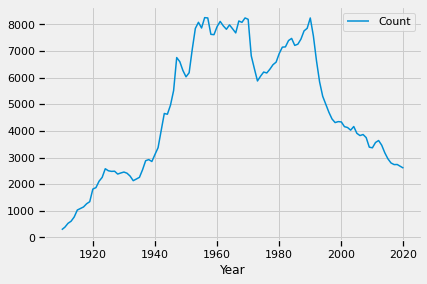

In [81]:
babynames.groupby("Year").agg(ammd).head(5)
babynames.groupby("Year").agg(ammd).plot()

#### groupby Puzzle #2

Inspired by above, try to predict the results of the groupby operation shown. The answer is below the image.

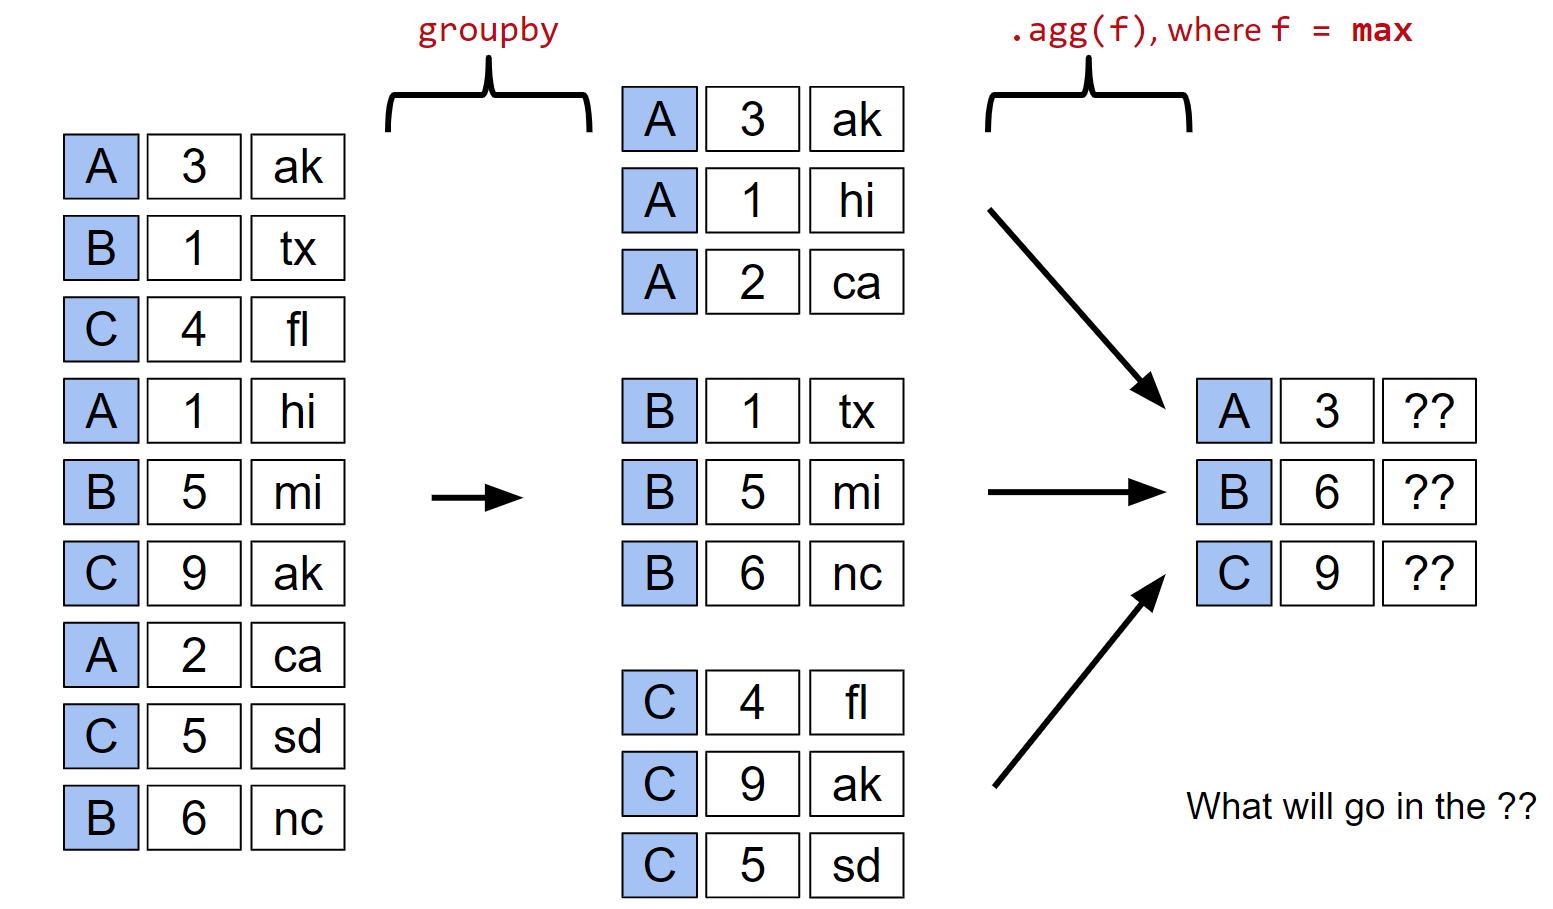

The top ?? will be "hi", the second ?? will be "tx", and the third ?? will be "sd". 

In [60]:
ds = pd.DataFrame(dict(x=[3,1,4,1,5,9,2,5,6], 
                      y=['ak', 'tx', 'fl', 'hi', 'mi', 'ak', 'ca', 'sd', 'nc']), 
                      index=list('ABCABCACB') )
ds

x   y
A  3  ak
B  1  tx
C  4  fl
A  1  hi
B  5  mi
C  9  ak
A  2  ca
C  5  sd
B  6  nc

In [61]:
ds.groupby(ds.index).agg(max)

x   y
A  3  hi
B  6  tx
C  9  sd

You'll soon discover that with Pandas' rich tool set, there's typically more than one way to get to the same answer. Each approach has different tradeoffs in terms of readability, performance, memory consumption, complexity and more.  It will take some experience for you to develop a sense of which approach is better for each problem, but you should in general try to think if you can at least envision a different solution to a given problem, especially if you find your current solution to be particularly convoluted or hard to read.

Here's a couple of other ways of obtaining the same result (in each case we only show the top part with `head()`).  The first approach uses `groupby` but finds the location of the maximum value via the `idxmax()` method (look up its documentation!).  We then index and sort by party to match the requested formatting:

*Challenge:* see if you can find yet another approach that still gives the same answer.

---

## Other groupby Features

### groupby.size()

In [71]:
babynames.groupby("Name")

In [9]:
#size returns a Series giving the size of each group


### groupby.filter()

In [10]:
# filter gives a copy of the original DataFrame where row r is included
# if its group obeys the given condition
#
# Note: Filtering is done per GROUP, not per ROW.


In [82]:
for i, (n, g) in enumerate(babynames.groupby("Year")):
    print(n)
    display(g.head(2))
    if i>3: break

1910


State Sex  Year     Name  Count
232136    CA   M  1910   Eugene     23
189       CA   F  1910  Cecilia      6

1911


State Sex  Year    Name  Count
287       CA   F  1911  Jennie     32
232236    CA   M  1911   James    119

1912


State Sex  Year       Name  Count
734       CA   F  1912      Beryl      6
232478    CA   M  1912  Alexander     14

1913


State Sex  Year    Name  Count
232726    CA   M  1913   Lewis     20
959       CA   F  1913  Masako     14

1914


State Sex  Year    Name  Count
1433    CA   F  1914  Mollie      6
1196    CA   F  1914   Pearl     48

### groupby.sum(), groupby.mean(), etc.

As an alternative to groupby.agg(sum), we can also simply do groupby.sum().

The same applies for many other common operations.

In [11]:
#babynames.groupby("Year").mean().head()
#babynames.groupby("Year").median().head()
#babynames.groupby("Year").max().head()

## Pivot Tables

It is possible to group a DataFrame by multiple features. For example, if we group by Year and Sex we get back a DataFrame with the total number of babies of each sex born in each year.

### Goal 5: Finding the number of babies born in each year of each sex.

Suppose we want to build a table showing the total number of babies born of each sex in each year. One way is to groupby using both columns of interest.

A more natural approach is to use a pivot table (like we saw in Intro to pandas - I).

In [97]:
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count', 'Name'], # the field(s) to processed in each group
    aggfunc=np.max, # group operation
)
babynames_pivot.head(6)

Count          Name         
Sex      F     M       F        M
Year                             
1910   295   237  Yvonne  William
1911   390   214   Zelma   Willis
1912   534   501  Yvonne  Woodrow
1913   584   614   Zelma   Yoshio
1914   773   769   Zelma   Yoshio
1915   998  1033    Zita    Yukio

The basic idea behind pivot tables is shown in the image below.

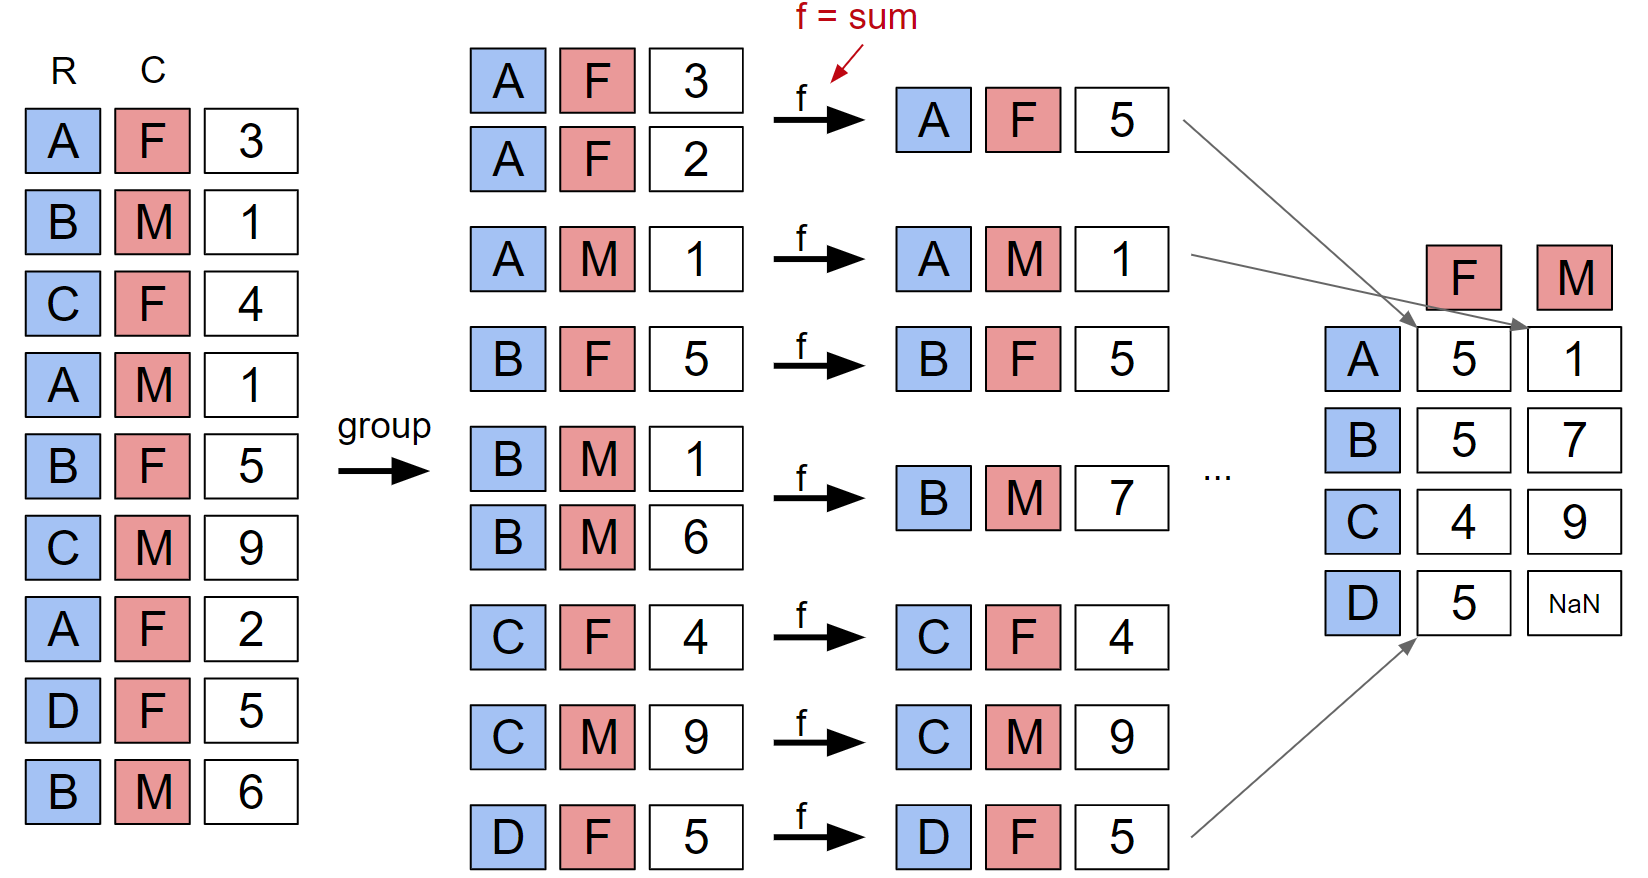

### Extra Groupby Puzzle

### groupby puzzle #5:  More careful look at the most popular 2018 name in California.

In goal 1, we didn't take into account the unlikely possibility that the most popular name was actually spread across both birth sexes. For example, what if in the table below it turns out that there were 300 female Noahs born in CA in 2018. In that case, Noah would actually be the most popular.

Since our queries are getting pretty long, I've stuck them inside parentheses which allows us to spread them over many lines.

In [13]:
(
babynames[babynames["Year"] == 2018]
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

NameError: name 'babynames' is not defined

Try to add a single line to the operation above so that each row represents the sum of male and female babies born in 2018 with that name. To do this, fill in the ??? below.

In [12]:
(
babynames[babynames["Year"] == 2018]
    #???
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

NameError: name 'babynames' is not defined

In [101]:
ammd2 = lambda L: max(L) - min(L)
print(ammd2([1, 2, 3, 4, 5]))

4
